In [2]:


import tensorflow as tf

from tensorflow.keras.applications import VGG19

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.regularizers import l2

# Define the directories for training and validation

train_data_dir = '/content/drive/MyDrive/SplitImages/train'

validation_data_dir = '/content/drive/MyDrive/SplitImages/validation'

# Load the VGG19 model with pre-trained weights and discard the top (fully connected) layers

base_model = VGG19(include_top=False, weights='imagenet', input_shape=(375, 375, 3))

# Freeze the pre-trained layers

for layer in base_model.layers:

    layer.trainable = False
# Add your own fully connected layers with regularization and batch normalization

x = GlobalAveragePooling2D()(base_model.output)

x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)

x = Dropout(0.5)(x)

output_binary = Dense(1, activation='sigmoid')(x)

model_binary = Model(inputs=base_model.input, outputs=output_binary)

# Define early stopping and learning rate reduction callbacks

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Model checkpoint to save the best model during training

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

# Define batch sizes and other parameters

batch_size_train = 32

batch_size_val = 16

epochs = 100
# Data generators with augmentation

train_datagen = ImageDataGenerator(

    rescale=1.0 / 255,

    rotation_range=30,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True

)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_generator = train_datagen.flow_from_directory(

    train_data_dir,

    target_size=(375, 375),

    batch_size=batch_size_train,

    classes=['Non-Viable-Tumor','Viabler'],

    class_mode='binary'

)

validation_generator = validation_datagen.flow_from_directory(

    validation_data_dir,

    target_size=(375, 375),

    batch_size=batch_size_val,

    classes=['Non-Viable-Tumor','Viabler'],

    class_mode='binary'

)
# Compile the model

optimizer = Adam(learning_rate=0.0001)

model_binary.compile(

    optimizer=optimizer,

    loss='binary_crossentropy',

    metrics=['accuracy']

)

# Fit the model with additional dropout and augmented data

history = model_binary.fit(

    train_generator,

    steps_per_epoch=train_generator.samples // batch_size_train,

    epochs=epochs,

    validation_data=validation_generator,

    validation_steps=validation_generator.samples // batch_size_val,

    callbacks=[early_stopping, reduce_lr, model_checkpoint]

)

# Load the best model weights

model_binary.load_weights('best_model.h5')

# Print the classes used for binary classification

print("Classes used for binary classification:", train_generator.class_indices)

80134624/80134624 [==============================] - 0s 0us/step
Found 221 images belonging to 2 classes.
Found 76 images belonging to 2 classes.
Epoch 1/100
6/6 [==============================] - 66s 9s/step - loss: 0.7923 - accuracy: 0.8466 - val_loss: 0.6356 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/100
6/6 [==============================] - 10s 2s/step - loss: 0.6332 - accuracy: 0.9630 - val_loss: 0.5295 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/100
6/6 [==============================] - 9s 1s/step - loss: 0.5361 - accuracy: 0.9947 - val_loss: 0.4635 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/100
6/6 [==============================] - 10s 2s/step - loss: 0.4585 - accuracy: 1.0000 - val_loss: 0.4197 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/100
6/6 [==============================] - 10s 2s/step - loss: 0.4236 - accuracy: 1.0000 - val_loss: 0.3900 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/100
6/6 [==============================] - 9s 2s/step - loss: 0.394

In [30]:
test_data_dir = '/content/drive/MyDrive/SplitImages/test'



test_datagen = ImageDataGenerator(

    rescale=1.0 / 255,

    preprocessing_function=tf.keras.applications.vgg19.preprocess_input

)



test_generator = test_datagen.flow_from_directory(

    test_data_dir,

    target_size=(375, 375),

    batch_size=batch_size_val,  # Use batch_size_val for testing

    classes=['Non-Viable-Tumor', 'Viabler'],

    class_mode='binary'

)



# Evaluate the model on the test data

test_loss, test_accuracy = model_binary.evaluate(test_generator)



print("Test Loss:", test_loss)

print("Test Accuracy:", test_accuracy)

Found 19 images belonging to 2 classes.
2/2 [==============================] - 1s 72ms/step - loss: 0.0912 - accuracy: 1.0000
Test Loss: 0.09116069972515106
Test Accuracy: 1.0


Layer Index: 1, Layer Name: block1_conv1
Layer Index: 2, Layer Name: block1_conv2
Layer Index: 4, Layer Name: block2_conv1
Layer Index: 5, Layer Name: block2_conv2
Layer Index: 7, Layer Name: block3_conv1
Layer Index: 8, Layer Name: block3_conv2
Layer Index: 9, Layer Name: block3_conv3
Layer Index: 10, Layer Name: block3_conv4
Layer Index: 12, Layer Name: block4_conv1
Layer Index: 13, Layer Name: block4_conv2
Layer Index: 14, Layer Name: block4_conv3
Layer Index: 15, Layer Name: block4_conv4
Layer Index: 17, Layer Name: block5_conv1
Layer Index: 18, Layer Name: block5_conv2
Layer Index: 19, Layer Name: block5_conv3
Layer Index: 20, Layer Name: block5_conv4


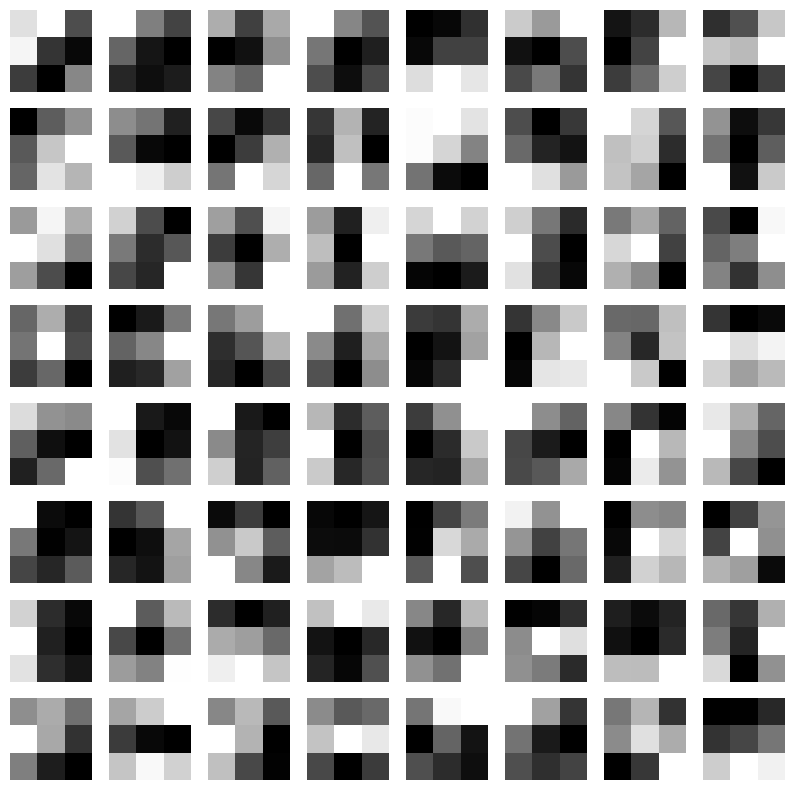

In [32]:
from tensorflow.keras.models import Model



import matplotlib.pyplot as plt



model_layers = model_binary.layers





for index, layer in enumerate(model_layers):



    if 'conv' in layer.name:

        print(f"Layer Index: {index}, Layer Name: {layer.name}")



index_of_conv_layer = 2





conv_layer = model_binary.layers[index_of_conv_layer]





filters, biases = conv_layer.get_weights()



normalized_filters = (filters - filters.min()) / (filters.max() - filters.min())



number_of_filters = filters.shape[3]



sqrt_number_of_filters = int(number_of_filters**0.5)





plt.figure(figsize=(10, 10))



for i in range(number_of_filters):



    plt.subplot(sqrt_number_of_filters, sqrt_number_of_filters, i+1)



    plt.imshow(normalized_filters[:, :, 0, i], cmap='gray')

    plt.axis('off')



plt.show()

Layer Index: 1, Layer Name: block1_conv1
Layer Index: 2, Layer Name: block1_conv2
Layer Index: 4, Layer Name: block2_conv1
Layer Index: 5, Layer Name: block2_conv2
Layer Index: 7, Layer Name: block3_conv1
Layer Index: 8, Layer Name: block3_conv2
Layer Index: 9, Layer Name: block3_conv3
Layer Index: 10, Layer Name: block3_conv4
Layer Index: 12, Layer Name: block4_conv1
Layer Index: 13, Layer Name: block4_conv2
Layer Index: 14, Layer Name: block4_conv3
Layer Index: 15, Layer Name: block4_conv4
Layer Index: 17, Layer Name: block5_conv1
Layer Index: 18, Layer Name: block5_conv2
Layer Index: 19, Layer Name: block5_conv3
Layer Index: 20, Layer Name: block5_conv4


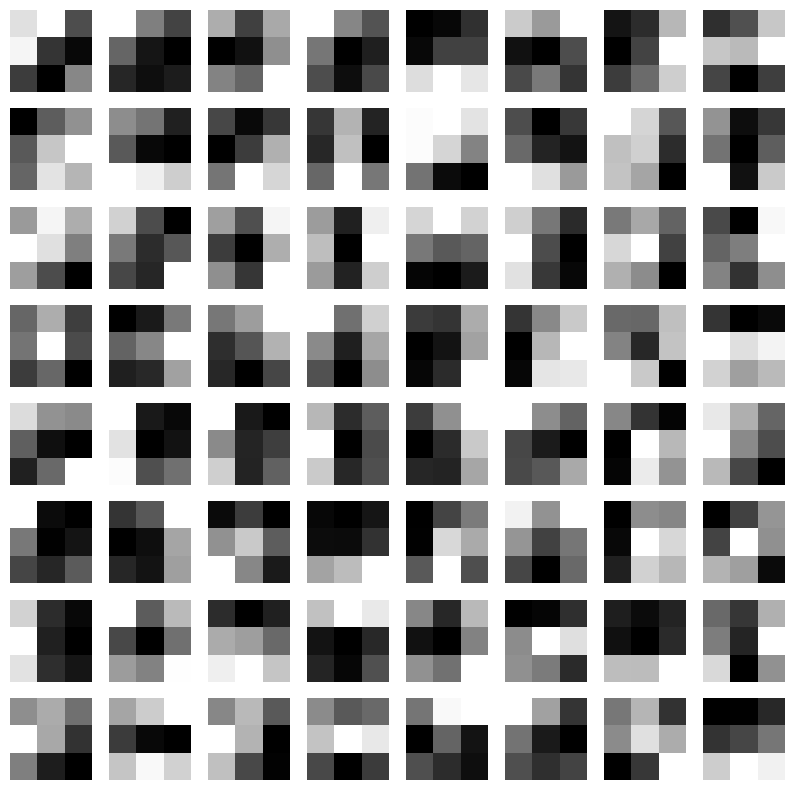

In [33]:


import matplotlib.pyplot as plt



# Get the list of layers in your model

model_layers = model_binary.layers



# Print the index and name of each layer to identify the convolutional layer

for index, layer in enumerate(model_layers):

    if 'conv' in layer.name:  # You can adjust this condition to identify the convolutional layers

        print(f"Layer Index: {index}, Layer Name: {layer.name}")



# Replace index_of_conv_layer with the actual index of the convolutional layer you want to visualize

index_of_conv_layer = 2  # Replace with the correct index



# Choose a convolutional layer to visualize

conv_layer = model_layers[index_of_conv_layer]



# Get the learned filters (kernels) for that layer

filters, biases = conv_layer.get_weights()



# Normalize the filters for visualization

normalized_filters = (filters - filters.min()) / (filters.max() - filters.min())



# Visualize the filters

number_of_filters = filters.shape[3]

sqrt_number_of_filters = int(number_of_filters**0.5)



plt.figure(figsize=(10, 10))



for i in range(number_of_filters):

    plt.subplot(sqrt_number_of_filters, sqrt_number_of_filters, i+1)

    plt.imshow(normalized_filters[:, :, 0, i], cmap='gray')  # Visualize only one channel of the filter

    plt.axis('off')



plt.show()





1/1 [==============================] - 0s 474ms/step


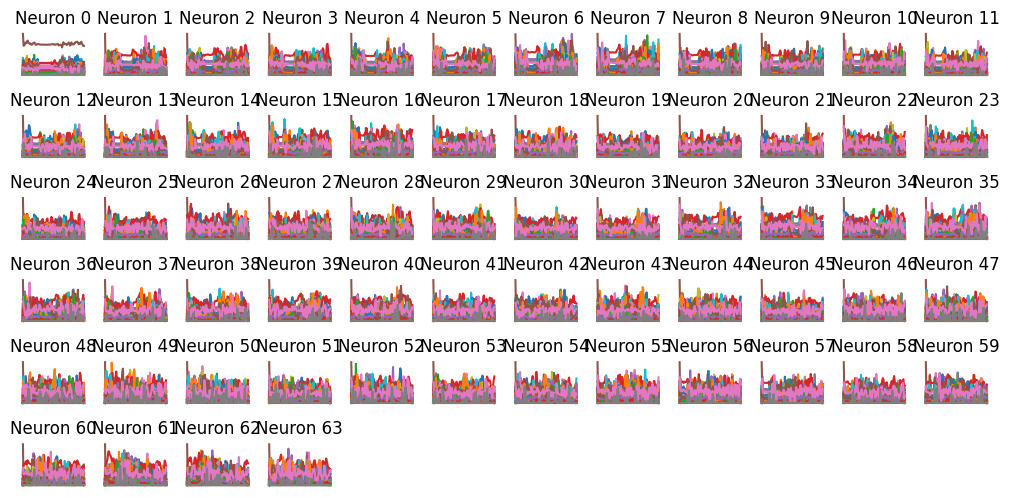

Class Names: ['Non-Viable-Tumor', 'Viabler']


In [35]:
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.models import Model



# Load the best model weights

model_binary = model_binary  # Replace with the actual path



# Create a new model that extracts the activations of the first dense layer

activation_model = Model(inputs=model_binary.input, outputs=model_binary.layers[6].output)



# Get the class indices from the generator

class_indices = train_generator.class_indices

class_names = list(class_indices.keys())



# Choose a random image batch from the validation generator

sample_batch = next(iter(validation_generator))

sample_images = sample_batch[0]



# Choose a random image index from the batch

image_index = np.random.randint(0, batch_size_val)



# Get the activations of the first dense layer for the selected image

activations = activation_model.predict(sample_images[image_index : image_index + 1])



# Determine the number of neurons in the layer

num_neurons = activations.shape[-1]



# Calculate the number of rows and columns for subplots

sqrt_num_neurons = int(np.ceil(np.sqrt(num_neurons)))



# Limit the number of neurons to visualize to a reasonable value

max_neurons_to_visualize = 64

num_neurons_to_visualize = min(max_neurons_to_visualize, num_neurons)



# Visualize the activations for each neuron

plt.figure(figsize=(10, 10))

for neuron_index in range(num_neurons_to_visualize):

    plt.subplot(sqrt_num_neurons, sqrt_num_neurons, neuron_index + 1)

    plt.plot(activations[0, neuron_index])

    plt.axis('off')

    plt.title(f'Neuron {neuron_index}')

plt.tight_layout()

plt.show()



# Print the class names

print("Class Names:", class_names)





